#  Project to recognise handwritten Characters using CNN

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import csv
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [1413]:
img_size = 75
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            Rimg = cv2.resize(img, (img_size, img_size))
            images.append([Rimg,filename])
    return images

In [1414]:
labels = pd.read_csv('english.csv', index_col = None)

i = 0
while i < 3410:
    labels["Image"][i] = labels["Image"][i][4:]
    i += 1
    

label_dict = labels.set_index("Image").T.to_dict()  ##contains {'image name': 'label'} as key:value pair

In [1415]:
input_imgs = load_images("Img")      ##images are loaded as numpy array using this function call 

In [1416]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train:  (3410, 200, 200, 1)
Shape of Y_train:  (3410, 1)


In [1417]:
data = []
for img  in input_imgs:
    data.append([img[0], label_dict[img[1]]["label"]])
    ##keeping   [IMAGE ARRAY, IMAGE LABEL] as list in data 

### Forming a class dict to label all classes to a integer

In [1418]:
class_dict = {}
inID = 10
for integer in range(0,10):
    class_dict[str(integer)] = integer

for char in range(65,65+26):
    class_dict[chr(char)] = inID
    inID += 1

for char in range(97,97+26):
    class_dict[chr(char)] = inID
    inID += 1
    
# class_dict  


In [1419]:
X_train = []
Y_train = []

for img_array, img_label in data:
    X_train.append(img_array)
    Y_train.append(img_label)
    
X_train = np.array(X_train)  ##contains all the images as img_sizeximg_size array       ##.reshape(-1, img_size, img_size, 1)
Y_train = np.array(Y_train)  ##contains array of all the labels -- 'a' 'b' '0' 

In [1420]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train :  (3410, 75, 75)
Shape of Y_train:  (3410,)


In [1421]:
X_train = X_train/255.0   ##scaling the values from 0 to 1

In [1422]:
## this block of code CONVERTS the STRING LABELS to INT CLASSES
l = 0
k = []
while l < 3410:
    k.append(class_dict[Y_train[l]])
    l += 1 
Y_train = np.array(k)  ##now Y_train contains labels as ({class dict - labels} INTEGER CLASSES)

In [1423]:
X_train = X_train.reshape(len(X_train), img_size, img_size, 1)
Y_train = Y_train.reshape(len(Y_train), 1)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train:  (3410, 75, 75, 1)
Shape of Y_train:  (3410, 1)


# tensorflow Model 

In [1508]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (img_size, img_size, 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
#     Conv2D(16, (3,3), activation = 'relu'),
#     MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(62, activation = 'softmax')
])

In [1509]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 73, 73, 16)        160       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 9248)              0         
                                                                 
 dense_46 (Dense)            (None, 128)             

In [1510]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20


2022-10-28 03:40:24.931783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 2s 37ms/step - loss: 4.0166 - accuracy: 0.0581
Epoch 2/20
54/54 [==============================] - 2s 31ms/step - loss: 3.0422 - accuracy: 0.2472
Epoch 3/20
54/54 [==============================] - 2s 31ms/step - loss: 2.1713 - accuracy: 0.4537
Epoch 4/20
54/54 [==============================] - 2s 30ms/step - loss: 1.6081 - accuracy: 0.5891
Epoch 5/20
54/54 [==============================] - 2s 32ms/step - loss: 1.1734 - accuracy: 0.6853
Epoch 6/20
54/54 [==============================] - 2s 29ms/step - loss: 0.8265 - accuracy: 0.7765
Epoch 7/20
54/54 [==============================] - 2s 30ms/step - loss: 0.5694 - accuracy: 0.8490
Epoch 8/20
54/54 [==============================] - 2s 30ms/step - loss: 0.4036 - accuracy: 0.8956
Epoch 9/20
54/54 [==============================] - 2s 30ms/step - loss: 0.2774 - accuracy: 0.9252
Epoch 10/20
54/54 [==============================] - 2s 30ms/step - loss: 0.1772 - accuracy: 0.9581
Epoch 11/20
54/54 [=

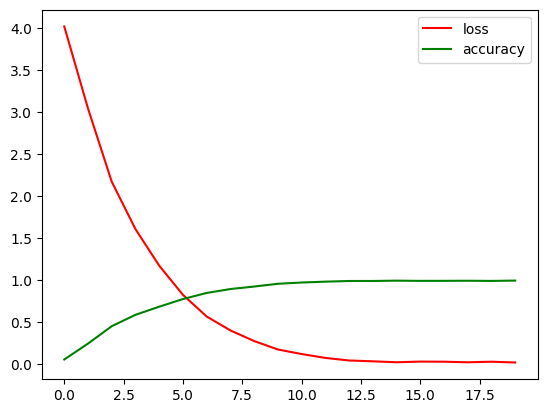

In [1511]:
# model.evaluate(X_train, Y_train)

plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.legend(loc = 'upper right')
# plt.grid(True)

# Making predictions

Image no. =  2059
Image label accd to dict:  35
1/1 [==============================] - 0s 14ms/step
Our model says it is : 35
It is found to be :  Z


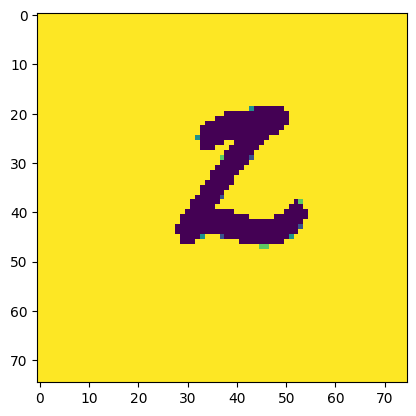

In [1526]:
# idx2 = random.randint(0, len(data))
# plt.imshow(data[idx2, 0, :])
# plt.show()
idx = random.randint(0, len(data))
print("Image no. = ",idx)
plt.imshow(data[idx][0]) #cmap = 'gray')
print("Image label accd to dict: ", y[idx])

y_pred = model.predict(data[idx][0].reshape(1, img_size, img_size, 1))
prediction = np.argmax(y_pred)

print("Our model says it is :", prediction)

print("It is found to be : ", list(class_dict.keys())
      [list(class_dict.values()).index(prediction)])
    
# print(y_pred)

In [1]:
testing_data = os.listdir('test_folder')
r = random.randint(0, len(testing_data)-1)
image = testing_data[r]
path = f"/Users/ratanprakash/Documents/tf_project/test_folder/{image}"
# path = r"/Users/ratanprakash/Documents/tf_project/test_folder/rr.png"

test_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (img_size, img_size))
# test_image = np.invert(test_image)
test_image = test_image/255.0
contrast_test_image = np.round_(test_image)
test_image = contrast_test_image
plt.imshow(test_image) #cmap='gray')

test_image = test_image.reshape(1, img_size, img_size, 1)
y_pred = model.predict(test_image)
prediction = np.argmax(y_pred)

print("Our model says it is a :", prediction)
print("It is estimated to be : ", list(class_dict.keys())
      [list(class_dict.values()).index(prediction)])
print(image)

NameError: name 'os' is not defined